# CAT AND DOG PRDICTION USING CNN

# Import necessary libraries

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import random


# Read data files


In [2]:
DIRECTORY = r"D:\machine learning\catanddogdata"

CATEGORIES = ['cats', 'dogs']

# preprocess the data

In [5]:
DATA = []  #store the image and labals( cat( 0 ) and dog( 1 ) ) 

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        new_arr = cv2.resize(arr, (140, 140))        #resize the image using cv2
        DATA.append([new_arr, label])

In [6]:
DATA[0]

[array([[167, 173, 173, ..., 209, 206, 204],
        [167, 173, 173, ..., 210, 207, 205],
        [167, 173, 173, ..., 211, 208, 206],
        ...,
        [126, 127, 128, ...,   3,   3,   2],
        [125, 126, 129, ...,   2,   2,   2],
        [123, 124, 128, ...,   2,   2,   2]], dtype=uint8),
 0]

In [7]:
# Shuffle the DATA list because the first are cat and last are dog in storing
# so suffle the data for training
random.shuffle(DATA)



In [8]:
DATA[3]

[array([[ 46,  46,  48, ...,  41,  40,  40],
        [ 46,  46,  48, ...,  40,  42,  41],
        [ 46,  46,  48, ...,  43,  43,  42],
        ...,
        [144, 145, 147, ..., 157, 156, 150],
        [142, 139, 143, ..., 157, 157, 159],
        [140, 135, 137, ..., 152, 152, 157]], dtype=uint8),
 0]

# separete the inputs and labals

In [9]:
INPUT = []  #   store the images in list
LABELS = []  #   store the labals of image
for input_labals in DATA:
    INPUT.append(input_labals[0])
    LABELS.append(input_labals[1])
    

In [10]:
print(len(INPUT))
print(len(LABELS))

25000
25000


In [11]:
INPUT = np.array(INPUT) / 255.0    # for normalization because they are 255 pixel in each chanel so each pixel is bw 0 and 1
LABELS = np.array(LABELS)

In [12]:
INPUT[3]

array([[0.18039216, 0.18039216, 0.18823529, ..., 0.16078431, 0.15686275,
        0.15686275],
       [0.18039216, 0.18039216, 0.18823529, ..., 0.15686275, 0.16470588,
        0.16078431],
       [0.18039216, 0.18039216, 0.18823529, ..., 0.16862745, 0.16862745,
        0.16470588],
       ...,
       [0.56470588, 0.56862745, 0.57647059, ..., 0.61568627, 0.61176471,
        0.58823529],
       [0.55686275, 0.54509804, 0.56078431, ..., 0.61568627, 0.61568627,
        0.62352941],
       [0.54901961, 0.52941176, 0.5372549 , ..., 0.59607843, 0.59607843,
        0.61568627]])

In [13]:

INPUT = INPUT.reshape(-1, 140, 140, 1)   #  only gray (1) channel

# Made the CNN Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [15]:
model=Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(140, 140, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))


In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(INPUT,LABELS, epochs=7, validation_split=0.1)

Epoch 1/7
704/704 [==============================] - 1000s 1s/step - loss: 0.6657 - accuracy: 0.5861 - val_loss: 0.6320 - val_accuracy: 0.6400
Epoch 2/7
704/704 [==============================] - 984s 1s/step - loss: 0.5560 - accuracy: 0.7156 - val_loss: 0.5414 - val_accuracy: 0.7440
Epoch 3/7
704/704 [==============================] - 2374s 3s/step - loss: 0.4302 - accuracy: 0.8024 - val_loss: 0.5211 - val_accuracy: 0.7564
Epoch 4/7
704/704 [==============================] - 1985s 3s/step - loss: 0.2638 - accuracy: 0.8902 - val_loss: 0.6613 - val_accuracy: 0.7396
Epoch 5/7
704/704 [==============================] - 2062s 3s/step - loss: 0.1066 - accuracy: 0.9615 - val_loss: 1.0169 - val_accuracy: 0.7256
Epoch 6/7
704/704 [==============================] - 1414s 2s/step - loss: 0.0422 - accuracy: 0.9860 - val_loss: 1.3393 - val_accuracy: 0.7248
Epoch 7/7
704/704 [==============================] - 1244s 2s/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 1.8534 - val_accuracy: 0.7296


In [19]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
def image(path):
    img = mpimg.imread(path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
    img = cv2.imread( path, cv2.IMREAD_GRAYSCALE )
    new_arr = cv2.resize(img, (140, 140))
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1, 140, 140, 1)
    return new_arr

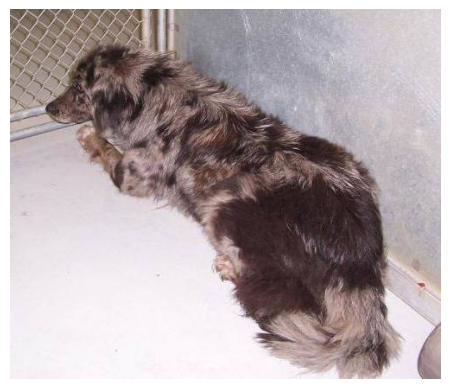

1/1 [==============================] - 0s 78ms/step
dogs


In [49]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
prediction = model.predict([image(r"D:\machine learning\dogscats\test1\2198.jpg")])
print(CATEGORIES[prediction.argmax()])